# Implementation and Comparison of AES & DES Encryption

Objectives:

* ✔ Understand DES and AES encryption principles.
* ✔ Implement DES and AES in Python.
* ✔ Compare their performance and security.
* ✔ Perform hands-on tasks to reinforce learning.







Introduction to AES & DES

🔹 Data Encryption Standard (DES)
* Symmetric block cipher (same key for encryption & decryption).
* Uses 56-bit key and encrypts 64-bit blocks.
* Feistel Network structure, 16 rounds.
* Weakness: Small key size → vulnerable to brute-force attacks.

🔹 Advanced Encryption Standard (AES)
* Symmetric block cipher (modern replacement for DES).
* Uses 128, 192, or 256-bit keys and encrypts 128-bit blocks.
* Substitution-Permutation Network (SPN) structure, 10-14 rounds.
* More secure & faster than DE

Comparison:
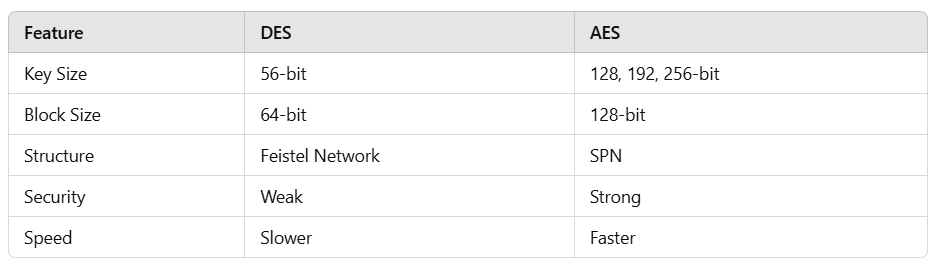

✅ Task 1 1 (Short Answer):
1️⃣ Why is DES considered weak?
2️⃣ Where is AES commonly used?

# Step 1: Implementing DES (10 min)

In [1]:
! pip install pycryptodome

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 24.8 MB/s eta 0:00:00


# Following code imports the library for performing enecryption and decryption.

We will use the following library:
https://pycryptodome.readthedocs.io/en/latest/



In [2]:
from Crypto.Cipher import DES
import base64


In [3]:
# Function to pad text to be multiple of 8 bytes
def pad(text, block_size):
    while len(text) % block_size != 0:
        text +=  ' '  # Padding with spaces
    return text


# The function encrypts a given plaintext using DES (Data Encryption Standard) in ECB mode. It first pads the plaintext to a multiple of 8 bytes, encrypts it using the provided key, and returns the Base64-encoded ciphertext.

In [4]:
# DES Encryption
def des_encrypt(plain_text, key):
    cipher = DES.new(key, DES.MODE_ECB)  # ECB mode
    plain_text_padded_text = pad(plain_text, DES.block_size)        # plain_text_pad the plain text to make its length a multiple of 8 bytes
    encrypted_text = cipher.encrypt(plain_text_padded_text.encode())  # Encrypt the plain_text_padded text
    return base64.b64encode(encrypted_text).decode()  # Return the encrypted text encoded in base64


# This code defines a function des_encrypt that encrypts a given plaintext using the DES encryption algorithm in ECB mode, padding the plaintext to match the block size before encryption.



In [5]:
# DES Decryption
def des_decrypt(encrypted_text, key):
    cipher = DES.new(key, DES.MODE_ECB)  # Create cipher with the same key and mode
    decrypted_text = cipher.decrypt(base64.b64decode(encrypted_text)).decode().strip()  # Decrypt and strip plain_text_padding
    return decrypted_text


In [9]:
# Testing DES
# Example usage:
key = b'SecretKe'  # DES key must be exactly 8 bytes long
plaintext = input("Enter the plaintext: ")
encrypted = des_encrypt(plaintext, key)
print("Encrypted text:", encrypted)
decrypted = des_decrypt(encrypted, key)
print("Decrypted text:", decrypted)


Enter the plaintext: Romana Marvi Rashid
Encrypted text: JT2xU6jARvbUM/qT6QoBw/p7FJIT+GNb
Decrypted text: Romana Marvi Rashid


✅ Task 2:  Modify the above code to accept user input for plaintext and key.

Hint - use input()

Following  code imports the necessary modules to perform AES encryption and decryption, including padding and unpadding functions, as well as base64 encoding/decoding.

In [10]:
from Crypto.Cipher import AES
import base64

Following code defines a function aes_encrypt that encrypts a given plaintext using the AES algorithm in ECB mode (we will learn the ECB mode later), pads the plaintext to match the block size, and then returns the encrypted text encoded in base64.

In [11]:
# AES Encryption
def aes_encrypt(plain_text, key):
    cipher = AES.new(key, AES.MODE_ECB)  # ECB mode
    print (type(plain_text))
    padded_text = pad(plain_text, AES.block_size)  # Pad the plain text to block size
    encrypted_text = cipher.encrypt(padded_text.encode())  # Encrypt the padded text
    return base64.b64encode(encrypted_text).decode()  # Return the encrypted text in base64 format


Following code defines a function aes_decrypt that decrypts a given base64-encoded ciphertext using the AES algorithm in ECB mode, then unpads the decrypted text and returns the plaintext.









In [12]:
# AES Decryption
def aes_decrypt(encrypted_text, key):
    cipher = AES.new(key, AES.MODE_ECB)  # Create the same AES cipher object
    decrypted_text = cipher.decrypt(base64.b64decode(encrypted_text)).decode().strip()  # Decrypt and strip plain_text_padding
    return decrypted_text


In [15]:
# Testing AES
key = b'16bytekeylengthp'  # AES requires 16-byte, 24-byte, or 32-byte key
plain_text = input("Enter the plaintext: ")
encrypted_text = aes_encrypt(plain_text, key)  # Encrypt the text
decrypted_text = aes_decrypt(encrypted_text, key)  # Decrypt the text

# Print the results
print(f"AES Encrypted: {encrypted_text}")  # Output the encrypted text
print(f"AES Decrypted: {decrypted_text}")  # Output the decrypted text


Enter the plaintext: Romana Marvi Rashid
<class 'str'>
AES Encrypted: RQZyqoOV7JIWK1D91eCPZTh++7+Ak3o05y0ZiMMe61o=
AES Decrypted: Romana Marvi Rashid


✅ Task 3: Modify the AES code to accept user input for plaintext and key.

✅ Task 4: Change the AES key size to 24 bytes and run the program.

Following  code measures the time taken to encrypt the plaintext "HelloCrypto" using the DES encryption algorithm by recording the start and end times and then printing the elapsed time.









In [16]:
import time

# Measure DES encryption time
key = b'SecretKe'
plain_text = input("Enter the plaintext: ") # The text to encrypt
start = time.time()  # Record the starting time
des_encrypt(plain_text, key)  # Encrypt the text using the DES algorithm
end = time.time()  # Record the ending time
print(f"DES Encryption Time: {end - start:.2f} sec")  # Calculate and print the time difference




KeyboardInterrupt: Interrupted by user

In [18]:
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad, unpad
import time


BLOCK_SIZE = 16

plain_text = input("Enter the plaintext: ")
key_input = input("Enter the AES key (exactly 24 characters): ")

while len(key_input.encode()) != 24:
    print(" Key must be exactly 24 bytes (characters) long.")
    key_input = input("Please re-enter a 24-byte key: ")

key = key_input.encode()


padded_text = pad(plain_text.encode(), BLOCK_SIZE)

start = time.time()


cipher = AES.new(key, AES.MODE_ECB)
encrypted = cipher.encrypt(padded_text)


end = time.time()

print(f"\nEncrypted (hex): {encrypted.hex()}")
print(f" AES Encryption Time: {end - start:.4f} sec")


decipher = AES.new(key, AES.MODE_ECB)
decrypted_padded = decipher.decrypt(encrypted)
decrypted = unpad(decrypted_padded, BLOCK_SIZE).decode()

print(f"Decrypted Text: {decrypted}")


Enter the plaintext: Romana Marvi Rashid
Enter the AES key (exactly 24 characters): 123456789012345678901234

Encrypted (hex): 6c11c356ac87d6b7c298aaad27cc3faf28144b926b2552df8a0bc744bdcffade
 AES Encryption Time: 0.0002 sec
Decrypted Text: Romana Marvi Rashid


✅ Task 5: In the following cell, write the Python code to measure the time taken by AES encryption *algorithm*

In [21]:
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad, unpad
import time

# AES encryption function using pycryptodome
def aes_encrypt(plain_text, key):
    BLOCK_SIZE = 16  # AES block size
    # Padding the plaintext to ensure it's a multiple of block size
    padded_text = pad(plain_text.encode(), BLOCK_SIZE)
    cipher = AES.new(key, AES.MODE_ECB)  # Using ECB mode for simplicity
    encrypted_text = cipher.encrypt(padded_text)
    return encrypted_text

# Measure AES encryption time
start = time.time()
key = b"1234567890abcdef"  # 16 bytes (for AES-128)
plain_text = "Romana Marvi Rashid"
encrypted = aes_encrypt(plain_text, key)
end = time.time()

print(f"AES Encryption Time: {end - start:.2f} sec")
print(f"Encrypted Text (hex): {encrypted.hex()}")


AES Encryption Time: 0.00 sec
Encrypted Text (hex): 2d91cf7355a8cb8e1a5571c66dc96ff067f47cdb8ba1f3b18ed548f5fbdb80be


In [28]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Following code encrpts the image using AES algorithm.
The image file is named as 'input.jpg'.

✅ Task 6: Test the code for different types of images and show the original abd cypherimage. Is your encryption method, good or bad?
Save your image as file name - input.jpg or change the code to adjust for any images.




Encrypted image saved as encrypted_ecb.png


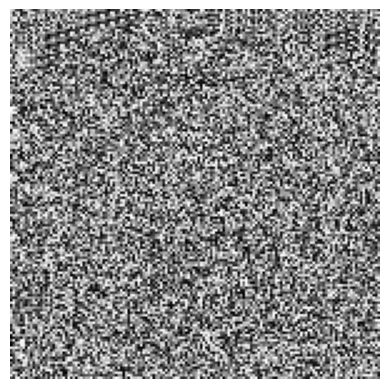

In [34]:
from Crypto.Cipher import AES
from Crypto.Util.Padding import pad, unpad
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt


def load_image(image_path):
    img = Image.open(image_path).convert('L')  # Convert to grayscale
    img_data = np.array(img)
    return img, img_data

def save_image(image_data, output_path):
    img = Image.fromarray(image_data)
    img.save(output_path)

def encrypt_ecb(image_data, key):
    cipher = AES.new(key, AES.MODE_ECB)
    shape = image_data.shape
    flat_data = image_data.flatten()
    padded_data = pad(flat_data.tobytes(), AES.block_size)
    encrypted_data = cipher.encrypt(padded_data)
    encrypted_array = np.frombuffer(encrypted_data, dtype=np.uint8)[:flat_data.size]
    return encrypted_array.reshape(shape)

def main():
    input_image = r"/content/drive/MyDrive/image.jpeg" # Change to your image file
    output_image = 'encrypted_ecb.png'
    key = os.urandom(16)  # 16-byte AES key

    img, img_data = load_image(input_image)
    encrypted_data = encrypt_ecb(img_data, key)
    save_image(encrypted_data, output_image)
    print(f"Encrypted image saved as {output_image}")

if __name__ == "__main__":
    main()

img = Image.open('encrypted_ecb.png')
plt.imshow(img, cmap='gray') # Displaying as grayscale
plt.axis('off')
plt.show()

**Important: Lab Logbook requirement**
Provide the following in your lab-log book.
1. Sample of plain and cypher text for AES and DES
2. Real image and cipher image for the image of any choice using AES.
3. Explain in one word - 'YES' or 'NO' whether your encryption method for the images is good.


--- DES Encryption ---
Enter plaintext for DES: Romana Marvi Rashid
Encrypted (DES): b'%=\xb1S\xa8\xc0F\xf6\xd43\xfa\x93\xe9\n\x01\xc3\x11\x84j#\x91\x88\x8d}'
Decrypted (DES): Romana Marvi Rashid

--- AES Encryption ---
Enter plaintext for AES: Romana Marvi Rashid
Encrypted (AES): b"l\x11\xc3V\xac\x87\xd6\xb7\xc2\x98\xaa\xad'\xcc?\xaf(\x14K\x92k%R\xdf\x8a\x0b\xc7D\xbd\xcf\xfa\xde"
Decrypted (AES): Romana Marvi Rashid

--- AES Timing ---
AES Encryption Time: 0.0003 sec

--- AES Image Encryption (ECB) ---
Encrypted image saved as: encrypted_ecb.png


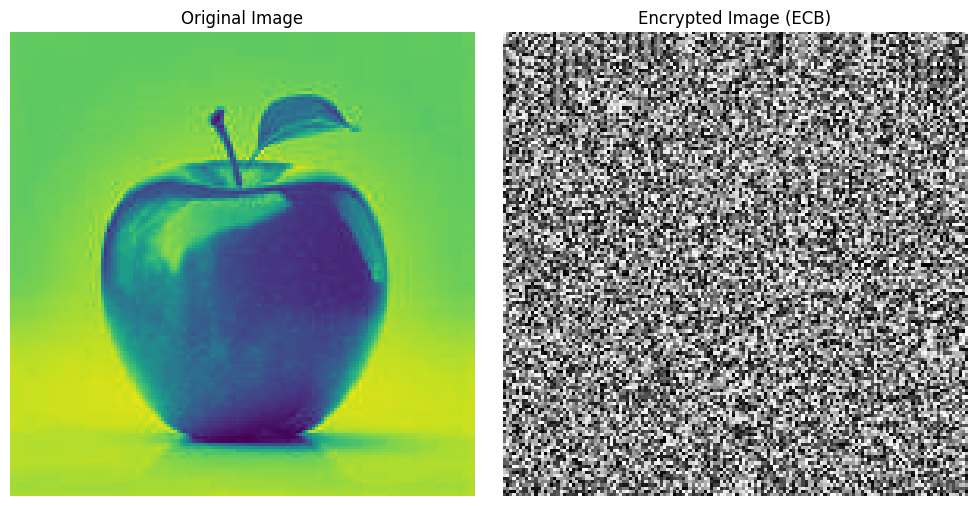

In [35]:
from Crypto.Cipher import DES, AES
from Crypto.Util.Padding import pad, unpad
from PIL import Image
import numpy as np
import os
import matplotlib.pyplot as plt
import time

# --- DES Text Encryption ---
def des_encrypt(plaintext, key):
    cipher = DES.new(key, DES.MODE_ECB)
    padded_text = pad(plaintext.encode(), DES.block_size)
    encrypted = cipher.encrypt(padded_text)
    return encrypted

def des_decrypt(ciphertext, key):
    cipher = DES.new(key, DES.MODE_ECB)
    decrypted = unpad(cipher.decrypt(ciphertext), DES.block_size)
    return decrypted.decode()

# --- AES Text Encryption ---
def aes_encrypt(plaintext, key):
    cipher = AES.new(key, AES.MODE_ECB)
    padded_text = pad(plaintext.encode(), AES.block_size)
    encrypted = cipher.encrypt(padded_text)
    return encrypted

def aes_decrypt(ciphertext, key):
    cipher = AES.new(key, AES.MODE_ECB)
    decrypted = unpad(cipher.decrypt(ciphertext), AES.block_size)
    return decrypted.decode()

# --- AES Image Encryption ---
def load_image(image_path):
    img = Image.open(image_path).convert('L')  # Grayscale
    return img, np.array(img)

def save_image(image_data, path):
    img = Image.fromarray(image_data)
    img.save(path)

def encrypt_ecb_image(image_data, key):
    cipher = AES.new(key, AES.MODE_ECB)
    shape = image_data.shape
    flat = image_data.flatten()
    padded = pad(flat.tobytes(), AES.block_size)
    encrypted = cipher.encrypt(padded)
    encrypted_arr = np.frombuffer(encrypted, dtype=np.uint8)[:flat.size]
    return encrypted_arr.reshape(shape)

# --- Main Program ---
def main():
    # DES
    print("\n--- DES Encryption ---")
    des_key = b'SecretKe'  # 8 bytes
    des_plain = input("Enter plaintext for DES: ")
    des_cipher = des_encrypt(des_plain, des_key)
    print("Encrypted (DES):", des_cipher)
    print("Decrypted (DES):", des_decrypt(des_cipher, des_key))

    # AES
    print("\n--- AES Encryption ---")
    aes_key = b'123456789012345678901234'  # 24 bytes for Task 4
    aes_plain = input("Enter plaintext for AES: ")
    aes_cipher = aes_encrypt(aes_plain, aes_key)
    print("Encrypted (AES):", aes_cipher)
    print("Decrypted (AES):", aes_decrypt(aes_cipher, aes_key))

    # AES Encryption Timing
    print("\n--- AES Timing ---")
    start = time.time()
    aes_encrypt(aes_plain, aes_key)
    end = time.time()
    print(f"AES Encryption Time: {end - start:.4f} sec")

    # AES Image Encryption
    print("\n--- AES Image Encryption (ECB) ---")
    img_path = "/content/drive/MyDrive/image.jpeg"  # Replace with your image path
    cipher_img_path = "encrypted_ecb.png"
    key_img = os.urandom(16)

    img, img_data = load_image(img_path)
    encrypted_img_data = encrypt_ecb_image(img_data, key_img)
    save_image(encrypted_img_data, cipher_img_path)

    print(f"Encrypted image saved as: {cipher_img_path}")

    # Display Original and Encrypted Image
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img)
    plt.title("Original Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    encrypted_img = Image.open(cipher_img_path)
    plt.imshow(encrypted_img, cmap='gray')
    plt.title("Encrypted Image (ECB)")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()
